In [1]:
import numpy as np
import pysal
import seaborn as sns
import matplotlib.pyplot as plt
import properscoring as ps
import warnings
from scipy import stats
from utils.evaluation import plot_predictions,plot_histogram,calc_peak,calc_mean
from utils.metrics import calculate_crps
from sklearn.metrics import mean_squared_error
from math import sqrt
warnings.filterwarnings("ignore")
sns.set_style("white")
sns.set_palette(sns.color_palette("Paired"))

/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [2]:
model = '_cat1_storms'
model = '_TS-0plus'
# set mode
mode = 'validation'
# mode = 'extreme_valid'
print(np.load('/user/home/al18709/work/tc_data_mswep/valid_X.npy').shape)


# load datasets
real = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_real-opt.npy' % (model,mode))[0][:,:,:,0]
pred = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0][:,:,:,0]
pred_ensemble = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0]
inputs = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_input-opt.npy' % (model,mode))[0][:,:,:,0]

# train_X = np.load('/user/work/al18709/tc_data_mswep/train_X.npy')
# train_y = np.load('/user/work/al18709/tc_data_mswep/train_y.npy')

print(pred_ensemble.shape)
print(pred[-1,:,:])
# real_train = np.load('/user/home/al18709/work/cgan_predictions/train_real.npy')[0][:,:,:,0]
# pred_train = np.load('/user/home/al18709/work/cgan_predictions/train_pred.npy')[0][:,:,:,0]
# inputs_train = np.load('/user/home/al18709/work/cgan_predictions/train_input.npy')[0][:,:,:,0]
plot_predictions(real,pred,inputs,plot='save',mode = mode)
# print(np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_real-opt.npy' % (model,mode)).shape)
# pred1 = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_real-opt.npy' % (model,mode))[0][:,:,:,1]
# plot_predictions(real,pred1,inputs,plot='show')
# pred2 = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0][:,:,:,2]
# plot_predictions(real,pred2,inputs,plot='show')
# pred3 = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_input-opt.npy' % (model,mode))[0][:,:,:,3]
# plot_predictions(real,pred3,inputs,plot='show')

(16253, 10, 10)
(2000, 100, 100, 4)
[[0.02292965 0.02268985 0.02001459 ... 1.78424203 1.57214844 1.01275492]
 [0.02961201 0.02929139 0.02550695 ... 2.12548494 1.92767572 1.36376595]
 [0.03069421 0.0306216  0.02681157 ... 2.15705919 1.91767251 1.31176138]
 ...
 [0.01746853 0.02121564 0.02605774 ... 0.43464836 0.38002232 0.37462029]
 [0.01543071 0.01870353 0.02291333 ... 0.23980017 0.20462619 0.18918046]
 [0.01484737 0.01800069 0.02212916 ... 0.22194187 0.18073595 0.16402468]]
72.125
76.67208099365234
51.871815
43.625
40.72423553466797
18.170303
53.6875
46.76891326904297
22.034012
54.75
39.807552337646484
23.184355


<Figure size 1080x1440 with 0 Axes>

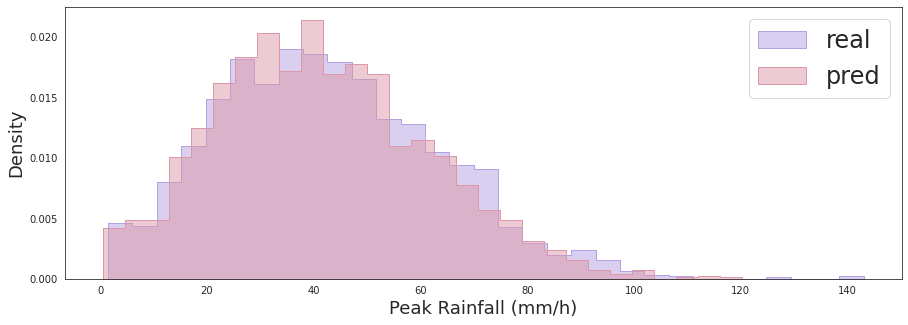

KstestResult(statistic=0.038, pvalue=0.11135887905231429)
KstestResult(statistic=0.038, pvalue=0.11135887905231429)


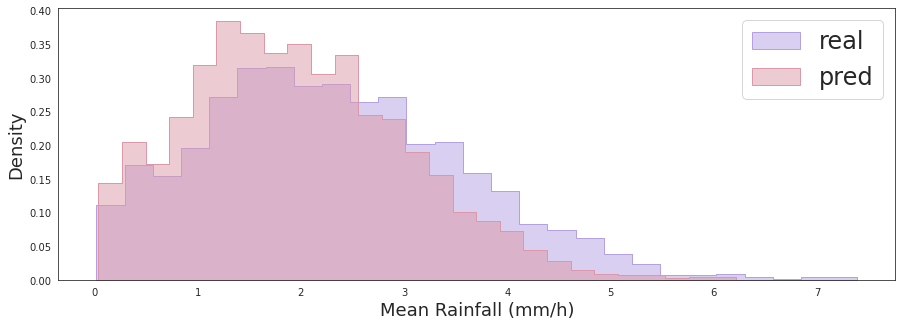

KstestResult(statistic=0.131, pvalue=2.2698876601340365e-15)
KstestResult(statistic=0.0, pvalue=1.0)


In [3]:
# metric 1
# A standard metric to check how the distributions compare
# TODO: integrate ensemble predictions
# distributions
peak_reals = calc_peak(real)
peak_preds = calc_peak(pred)
plot_histogram(peak_reals,peak_preds,5,0.5,type = 'Peak')
ks = stats.kstest(peak_reals, peak_preds)
print(ks)
ks = stats.ks_2samp(peak_reals, peak_preds)
print(ks)

mean_reals = calc_mean(real)
mean_preds = calc_mean(pred)
plot_histogram(mean_reals,mean_preds,5,0.5)
ks = stats.kstest(mean_reals, mean_preds)
print(ks)
ks = stats.kstest(mean_preds,mean_preds)
print(ks)

# ks null hypothesis: two samples drawn from populations with the same distributions
# if p-value is small then you can reject the null hypothesis
# I think we want the p value to be large? or close to 1?

# TODO: could do the same thing for the 90th percentile or just the extreme validation set

In [6]:
# metric 2 
# common probabilistic forecasting score
# CRPS
crps = calculate_crps(real,pred_ensemble)
print(crps.shape)
print(np.mean(np.mean(crps,axis=1),axis=1))
print(np.mean(crps))

crps = ps.crps_ensemble(real,pred_ensemble)
print(crps.shape)
print(np.mean(np.mean(crps,axis=1),axis=1))
print(np.mean(crps))

(2000, 100, 100)
[1.0166224  1.2139792  1.258771   ... 1.3930742  0.9897052  0.74884576]
1.0610352
(2000, 100, 100)
[1.01662237 1.21397907 1.25877085 ... 1.39307418 0.9897052  0.74884568]
1.0610353221107138


In [7]:
# metric 3
# standard sanity check, though not usually for stochastic models
# RMSE
nimages,_,_ = real.shape
RMSE = []
for i in range(nimages):
	rmse = sqrt(mean_squared_error(real[i], pred[i]))
	RMSE.append(rmse)

print(np.mean(RMSE))

2.838390968066997


In [8]:
# metric 4
# metric to look specifically at spatial structure
# https://gis.stackexchange.com/questions/273785/morans-i-on-2d-arrays-rasters
# Spatial Correlation
# Moran's I - positive, negative autocorrelation - positive means similar values are clustered together and negative mean there's no spatial pattern
# https://journals.ametsoc.org/view/journals/mwre/136/6/2007mwr2255.1.xml
# https://d1wqtxts1xzle7.cloudfront.net/49336481/Probabilistic_rainfall_thresholds_for_fl20161004-25957-1lpf9s8-with-cover-page-v2.pdf?Expires=1646313112&Signature=A~uO2wqiCKdkqPu~QolyURBkRguxzw9P84Yfw8PrWYRkrOXMDyxAaxQmJafqcQOtr1FR68gWjq3MaLa2KFV3OwSvhB8douIzF4TJDXSPChkdwAh7p-Yc5A5WNPCFTMZkGJ-DyP60hZObnZUKs7y45FUcM9sWIbLfMgIuZXrW7vzf8vIXeQi-44LzV98XKYItKe7DAaTxyEWHGmWdFmlwKmBi~88P6rxAZd5xvNIsb4qzWNY~go-fKV~5oTcPQcF2VcsINGMjOkeywMxJQSm0cwHKpmS-ikhiXkBa5BrqsbwRQLNcJnbsWj-berQFW111h2ODWsAIAGp1AcF8qyuTdg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA


w = pysal.lat2W(real[0].shape[0],real[0].shape[1], rook=False, id_type="int")
mir = pysal.Moran(real[0], w, permutations = 9999)
lm = pysal.Moran_Local(real[0],w)
moran_significance = np.reshape(lm.p_sim, real[0].shape)
print(mir.I)
w = pysal.lat2W(pred[0].shape[0],pred[0].shape[1], rook=False, id_type="int")
mir = pysal.Moran(pred[0], w, permutations = 9999)
lm = pysal.Moran_Local(pred[0],w)
moran_significance = np.reshape(lm.p_sim, pred[0].shape)
print(mir.I)
# print(lm)
# print(moran_significance)

0.932834656505192
0.9748360992570433


In [36]:
# metric 6
# Accumulated Rainfall


In [ ]:
# metric 7 
# Similarity Score